In [1]:
#Working Directory
wd = "C:/Users/nazar/Desktop/statistical machine learning/Individual Project"

In [2]:
import pandas as pd 
import numpy as np
from numpy import arange
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [3]:
#Load Data
df = pd.read_csv(wd + '/data/raw/credit_default_train.csv')

In [4]:
df.shape

(20000, 25)

In [5]:
df

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,18895,70000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,...,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,0
1,25102,390000.0,2.0,2.0,2.0,26.0,2.0,2.0,2.0,0.0,...,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,0
2,28867,60000.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,...,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,1
3,1842,140000.0,2.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,...,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,0
4,3371,50000.0,1.0,1.0,2.0,29.0,2.0,2.0,2.0,0.0,...,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5994,500000.0,1.0,2.0,2.0,36.0,1.0,-2.0,-1.0,0.0,...,116089.0,114293.0,118081.0,9125.0,126768.0,NaN,4050.0,15099.0,5015.0,0
19996,25043,30000.0,1.0,3.0,2.0,31.0,0.0,0.0,0.0,0.0,...,28075.0,29682.0,28001.0,2000.0,2000.0,2000.0,2014.0,2000.0,2000.0,0
19997,14281,20000.0,1.0,2.0,2.0,30.0,1.0,2.0,4.0,3.0,...,19860.0,19690.0,1735.0,2000.0,0.0,0.0,0.0,500.0,0.0,1
19998,28693,240000.0,1.0,2.0,2.0,67.0,0.0,0.0,0.0,0.0,...,468202.0,442401.0,419209.0,20225.0,17389.0,80167.0,15167.0,16000.0,13133.0,0


In [6]:
#Split the data
random.seed = 1
X_train, X_test, y_train, y_test = train_test_split(df.iloc[: , :24], 
    df['default.payment.next.month'], test_size = 0.2, stratify = df['default.payment.next.month'])

#Check dimensions
print('Train split size: ', X_train.shape)
print('Test split size: ', X_test.shape)

Train split size:  (16000, 24)
Test split size:  (4000, 24)


# Preprocessing

## Data correction

### Missing values

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 6703 to 17832
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cust_id    16000 non-null  int64  
 1   LIMIT_BAL  15831 non-null  float64
 2   SEX        15872 non-null  float64
 3   EDUCATION  15841 non-null  float64
 4   MARRIAGE   15860 non-null  float64
 5   AGE        15829 non-null  float64
 6   PAY_0      15841 non-null  float64
 7   PAY_2      15824 non-null  float64
 8   PAY_3      15829 non-null  float64
 9   PAY_4      15838 non-null  float64
 10  PAY_5      15852 non-null  float64
 11  PAY_6      15843 non-null  float64
 12  BILL_AMT1  15849 non-null  float64
 13  BILL_AMT2  15833 non-null  float64
 14  BILL_AMT3  15858 non-null  float64
 15  BILL_AMT4  15867 non-null  float64
 16  BILL_AMT5  15854 non-null  float64
 17  BILL_AMT6  15854 non-null  float64
 18  PAY_AMT1   15834 non-null  float64
 19  PAY_AMT2   15858 non-null  float64
 20  PAY

In [8]:
#Train
X_train['LIMIT_BAL'].isna().sum()
#Replace null values with mode
mode_lbalance = X_train['LIMIT_BAL'].mode()[0]
X_train['Missing_LIMIT_BAL'] = np.where(X_train['LIMIT_BAL'].isnull(), 1, 0 )
X_train['LIMIT_BAL'] = X_train['LIMIT_BAL'].fillna(mode_lbalance)

#test
X_test['LIMIT_BAL'].isna().sum()
#Replace null values with mode
X_test['Missing_LIMIT_BAL'] = np.where(X_test['LIMIT_BAL'].isnull(), 1, 0 )
X_test['LIMIT_BAL'] = X_test['LIMIT_BAL'].fillna(mode_lbalance)


In [9]:
#Train
X_train['SEX'].isna().sum()
#Replace null values with mode
mode_sex = X_train['SEX'].mode()[0]
X_train['missing_SEX'] = np.where(X_train['SEX'].isnull(), 1, 0 )
X_train['SEX'] = X_train['SEX'].fillna(mode_sex)

#test
X_test['SEX'].isna().sum()
#Replace null values with mode
X_test['missing_SEX'] = np.where(X_test['SEX'].isnull(), 1, 0 )
X_test['SEX'] = X_test['SEX'].fillna(mode_sex)

In [10]:
#Train
X_train['EDUCATION'].isna().sum()
#Replace null values with mode
mode_education = X_train['EDUCATION'].mode()[0]
X_train['missing_education'] = np.where(X_train['EDUCATION'].isnull(), 1, 0 )
X_train['EDUCATION'] = X_train['EDUCATION'].fillna(mode_education)

#test
X_test['EDUCATION'].isna().sum()
#Replace null values with mode
X_test['missing_education'] = np.where(X_test['EDUCATION'].isnull(), 1, 0 )
X_test['EDUCATION'] = X_test['EDUCATION'].fillna(mode_education)


In [11]:
#Train
X_train['MARRIAGE'].isna().sum()
#Replace null values with mode
mode_marriage = X_train['MARRIAGE'].mode()[0]
X_train['missing_MARRIAGE'] = np.where(X_train['MARRIAGE'].isnull(), 1, 0 )
X_train['MARRIAGE'] = X_train['MARRIAGE'].fillna(mode_education)

#test
X_test['MARRIAGE'].isna().sum()
#Replace null values with mode
X_test['missing_MARRIAGE'] = np.where(X_test['MARRIAGE'].isnull(), 1, 0 )
X_test['MARRIAGE'] = X_test['MARRIAGE'].fillna(mode_marriage)

In [12]:
#Train
X_train['AGE'].isna().sum()
#Replace null values with mode
mode_age = X_train['AGE'].mean()
X_train['missing_AGE'] = np.where(X_train['AGE'].isnull(), 1, 0 )
X_train['AGE'] = X_train['AGE'].fillna(mode_age)

#test
X_test['AGE'].isna().sum()
#Replace null values with mode
X_test['missing_AGE'] = np.where(X_test['AGE'].isnull(), 1, 0 )
X_test['AGE'] = X_test['AGE'].fillna(mode_age)

In [13]:
for column in X_train.columns[0:]:
    if X_train[column].isna().sum()>0:
        X_train['missing' + str(column)] = np.where(X_train[column]==0, 1, 0)
        X_train[column].fillna(0, inplace = True)
    
for column in X_test.columns[0:]:
    if X_test[column].isna().sum()>0:
        X_test['missing' + str(column)] = np.where(X_test[column]==0, 1, 0)
        X_test[column].fillna(0, inplace = True)    

In [14]:
X_train.isna().sum()

cust_id              0
LIMIT_BAL            0
SEX                  0
EDUCATION            0
MARRIAGE             0
AGE                  0
PAY_0                0
PAY_2                0
PAY_3                0
PAY_4                0
PAY_5                0
PAY_6                0
BILL_AMT1            0
BILL_AMT2            0
BILL_AMT3            0
BILL_AMT4            0
BILL_AMT5            0
BILL_AMT6            0
PAY_AMT1             0
PAY_AMT2             0
PAY_AMT3             0
PAY_AMT4             0
PAY_AMT5             0
PAY_AMT6             0
Missing_LIMIT_BAL    0
missing_SEX          0
missing_education    0
missing_MARRIAGE     0
missing_AGE          0
missingPAY_0         0
missingPAY_2         0
missingPAY_3         0
missingPAY_4         0
missingPAY_5         0
missingPAY_6         0
missingBILL_AMT1     0
missingBILL_AMT2     0
missingBILL_AMT3     0
missingBILL_AMT4     0
missingBILL_AMT5     0
missingBILL_AMT6     0
missingPAY_AMT1      0
missingPAY_AMT2      0
missingPAY_

In [15]:
X_train['PAY_0'].value_counts()

 0.0    7883
-1.0    3027
 1.0    1986
-2.0    1447
 2.0    1427
 3.0     155
 4.0      41
 5.0      17
 8.0      10
 6.0       4
 7.0       3
Name: PAY_0, dtype: int64

In [16]:
X_train[X_train.isna().any(axis=1)]

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,missingBILL_AMT3,missingBILL_AMT4,missingBILL_AMT5,missingBILL_AMT6,missingPAY_AMT1,missingPAY_AMT2,missingPAY_AMT3,missingPAY_AMT4,missingPAY_AMT5,missingPAY_AMT6


In [17]:
X_train.isna().sum()

cust_id              0
LIMIT_BAL            0
SEX                  0
EDUCATION            0
MARRIAGE             0
AGE                  0
PAY_0                0
PAY_2                0
PAY_3                0
PAY_4                0
PAY_5                0
PAY_6                0
BILL_AMT1            0
BILL_AMT2            0
BILL_AMT3            0
BILL_AMT4            0
BILL_AMT5            0
BILL_AMT6            0
PAY_AMT1             0
PAY_AMT2             0
PAY_AMT3             0
PAY_AMT4             0
PAY_AMT5             0
PAY_AMT6             0
Missing_LIMIT_BAL    0
missing_SEX          0
missing_education    0
missing_MARRIAGE     0
missing_AGE          0
missingPAY_0         0
missingPAY_2         0
missingPAY_3         0
missingPAY_4         0
missingPAY_5         0
missingPAY_6         0
missingBILL_AMT1     0
missingBILL_AMT2     0
missingBILL_AMT3     0
missingBILL_AMT4     0
missingBILL_AMT5     0
missingBILL_AMT6     0
missingPAY_AMT1      0
missingPAY_AMT2      0
missingPAY_

### Outliers

In [18]:
# Joining X_train and Y_train,  X_test and Y_test
X_train['target'] = y_train
X_test['target'] = y_test

train = X_train.copy()
test = X_test.copy()

In [19]:
## Code from professor Minh

num_vars = ['LIMIT_BAL', 'AGE','BILL_AMT1', 'BILL_AMT2',
    'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ] 

cat_vars = ['MARRIAGE','EDUCATION','SEX', 
    'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Check the outliers on train, test
for v in num_vars:
    # Calculate the boundaries on train [mean-3*sd, mean+3*sd]
    mu = np.mean(train[v])
    sd = np.std(train[v])
    lower = mu - 3*sd
    upper = mu + 3*sd
    # Check outliers using the boundaries
    train_out = (train[v] < lower) | (train[v] > upper)
    test_out = (test[v] < lower) | (test[v] > upper)
    if np.sum(train_out) + np.sum(test_out) > 0:
        print(v, "has # outliers on train, test :",
              np.sum(train_out), "[", np.round(100*np.mean(train_out), 2), "% ]",
              np.sum(test_out), "[", np.round(100*np.mean(test_out), 2), "% ]")

LIMIT_BAL has # outliers on train, test : 70 [ 0.44 % ] 22 [ 0.55 % ]
AGE has # outliers on train, test : 70 [ 0.44 % ] 19 [ 0.48 % ]
BILL_AMT1 has # outliers on train, test : 366 [ 2.29 % ] 92 [ 2.3 % ]
BILL_AMT2 has # outliers on train, test : 363 [ 2.27 % ] 94 [ 2.35 % ]
BILL_AMT3 has # outliers on train, test : 353 [ 2.21 % ] 86 [ 2.15 % ]
BILL_AMT4 has # outliers on train, test : 362 [ 2.26 % ] 83 [ 2.08 % ]
BILL_AMT5 has # outliers on train, test : 347 [ 2.17 % ] 85 [ 2.12 % ]
BILL_AMT6 has # outliers on train, test : 351 [ 2.19 % ] 86 [ 2.15 % ]
PAY_AMT1 has # outliers on train, test : 226 [ 1.41 % ] 56 [ 1.4 % ]
PAY_AMT2 has # outliers on train, test : 152 [ 0.95 % ] 37 [ 0.92 % ]
PAY_AMT3 has # outliers on train, test : 201 [ 1.26 % ] 39 [ 0.98 % ]
PAY_AMT4 has # outliers on train, test : 242 [ 1.51 % ] 52 [ 1.3 % ]
PAY_AMT5 has # outliers on train, test : 216 [ 1.35 % ] 54 [ 1.35 % ]
PAY_AMT6 has # outliers on train, test : 238 [ 1.49 % ] 64 [ 1.6 % ]


In [20]:
print((train_out==True).sum())
print((test_out==True).sum())

238
64


In [21]:
#Removing outliers
train = train[train_out == False]
test = test[test_out== False]

## Feature Engineering 

In [22]:
train['PAY_0'].value_counts()

 0.0    7767
-1.0    2969
 1.0    1975
-2.0    1417
 2.0    1406
 3.0     155
 4.0      40
 5.0      16
 8.0      10
 6.0       4
 7.0       3
Name: PAY_0, dtype: int64

In [23]:
# Changing categories for Pay columns 
pay= ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

#Train
for c in pay:
    train[c] = np.where(train[c] == -2, 1, 
        np.where(train[c] == -1, 2, 
            np.where(train[c] == 0, 3,
                np.where(train[c] ==1 , 4, 5))))
#Test
for c in pay:
    test[c] = np.where(test[c] == -2, 1, 
        np.where(test[c] == -1, 2, 
            np.where(test[c] == 0, 3,
                np.where(test[c] ==1 , 4, 5))))

In [24]:
# Changing categories for Age column
train['AGE'].value_counts()

29.000000    853
27.000000    773
30.000000    734
28.000000    732
26.000000    651
31.000000    617
24.000000    607
33.000000    604
34.000000    599
36.000000    582
32.000000    582
25.000000    577
35.000000    567
37.000000    508
23.000000    502
39.000000    499
38.000000    488
40.000000    459
41.000000    416
42.000000    413
44.000000    370
43.000000    353
45.000000    320
46.000000    311
22.000000    291
47.000000    270
48.000000    246
49.000000    235
50.000000    208
51.000000    187
53.000000    170
52.000000    169
35.537558    164
54.000000    134
55.000000    105
56.000000     93
57.000000     63
58.000000     57
59.000000     51
60.000000     36
61.000000     27
21.000000     27
62.000000     23
63.000000     19
64.000000     18
66.000000     12
67.000000      7
69.000000      7
70.000000      7
65.000000      7
73.000000      4
75.000000      3
68.000000      2
71.000000      2
74.000000      1
Name: AGE, dtype: int64

In [25]:
#Train

train['AGE'] = np.where(train['AGE'] < 30, 1, 
        np.where(train['AGE'] < 40 , 2, 
            np.where(train['AGE'] < 50, 3, 4)))
                
#Test
test['AGE'] = np.where(test['AGE'] < 30, 1, 
        np.where(test['AGE'] < 40 , 2, 
            np.where(test['AGE'] < 50, 3, 4)))
                

In [26]:
bins = [20, 30, 40, 50, 80]
labels = ['1', '2', '3', '4']

#Train
train['age_range'] = pd.cut(X_train.AGE, bins, labels = labels, include_lowest = True) 
train = train.drop(columns=['AGE'])

#Test
test['age_range'] = pd.cut(test.AGE, bins, labels = labels, include_lowest = True) 
test = test.drop(columns=['AGE'])

In [27]:
train['age_range'] = train['age_range'].astype(int)

In [28]:
train.dtypes

cust_id                int64
LIMIT_BAL            float64
SEX                  float64
EDUCATION            float64
MARRIAGE             float64
PAY_0                  int32
PAY_2                  int32
PAY_3                  int32
PAY_4                  int32
PAY_5                  int32
PAY_6                  int32
BILL_AMT1            float64
BILL_AMT2            float64
BILL_AMT3            float64
BILL_AMT4            float64
BILL_AMT5            float64
BILL_AMT6            float64
PAY_AMT1             float64
PAY_AMT2             float64
PAY_AMT3             float64
PAY_AMT4             float64
PAY_AMT5             float64
PAY_AMT6             float64
Missing_LIMIT_BAL      int32
missing_SEX            int32
missing_education      int32
missing_MARRIAGE       int32
missing_AGE            int32
missingPAY_0           int32
missingPAY_2           int32
missingPAY_3           int32
missingPAY_4           int32
missingPAY_5           int32
missingPAY_6           int32
missingBILL_AM

In [29]:
# defining the new numerical variables
num_vars = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
    'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
    'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ] 
#Scaling the numerical values
for v in num_vars:
    scaler = MinMaxScaler().fit(train[[v]])
    train[v] = scaler.transform(train[[v]])
    test[v] = scaler.transform(test[[v]])

Drop duplicates

In [30]:
# Count the duplicated vars
dup_vars = train.T.duplicated()
print('# duplicated vars :', dup_vars.sum())

# duplicated vars : 0


## Feature Selection

In [31]:
# Create several lists to handle variables
id_var = ['cust_id']
target_var = ['target']
predictors = [v for v in train.columns if v not in id_var + target_var]

In [32]:
random.seed = 1
def FisherScore(bt, target_var, predictors):
    """
    This function calculate the Fisher score of a variable.

    Ref:
    ---
    Verbeke, W., Dejaeger, K., Martens, D., Hur, J., & Baesens, B. (2012). New insights
    into churn prediction in the telecommunication sector: A profit driven data mining
    approach. European Journal of Operational Research, 218(1), 211-229.
    """
    
    # Get the unique values of dependent variable
    target_var_val = bt[target_var].unique()
    # Calculate FisherScore for each predictor
    predictor_FisherScore = []
    for v in predictors:
        fs = np.abs(np.mean(bt.loc[bt[target_var]==target_var_val[0], v]) - np.mean(bt.loc[bt[target_var]==target_var_val[1], v])) / \
             np.sqrt(np.var(bt.loc[bt[target_var]==target_var_val[0], v]) + np.var(bt.loc[bt[target_var]==target_var_val[1], v]))
        predictor_FisherScore.append(fs)
    return predictor_FisherScore

In [33]:
random.seed = 1
# Calculate Fisher Score for all variable
fs = FisherScore(train, target_var[0], predictors)
fs_df = pd.DataFrame({"predictor":predictors, "fisherscore":fs})
fs_df = fs_df.sort_values('fisherscore', ascending=False)
fs_df.head()

,predictor,fisherscore
4,PAY_0,0.514210
5,PAY_2,0.395272
27,missingPAY_0,0.392606
6,PAY_3,0.349957
7,PAY_4,0.317155


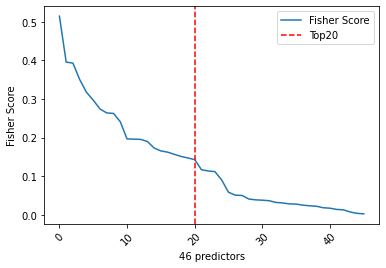

In [34]:
# Visualize the Fisher Score
plt.plot(fs_df['fisherscore'].values.squeeze())
plt.axvline(x=20, linestyle='dashed', color='red')
plt.xticks(rotation=45)
plt.xlabel(str(fs_df.shape[0]) + ' predictors')
plt.ylabel('Fisher Score')
plt.legend(['Fisher Score', 'Top20'])
plt.show()

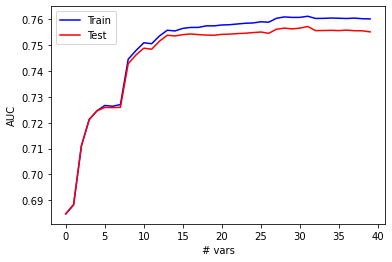

In [35]:
random.seed = 1
# Check how AUC change when add more variables: Top n vars
fs_scores = []
top_n_vars = 40
for i in range(1, top_n_vars+1):
    if i % 100 == 0: print('Added # top vars :', i)
    top_n_predictors = fs_df['predictor'][:i]
    clf = LogisticRegression()
    fs_scores.append(cross_validate(clf, train[top_n_predictors], train[target_var].values.squeeze(),
                                    scoring='roc_auc', cv=5, verbose=0, n_jobs=-1, return_train_score=True))

# How the AUC curve looks like when adding top vars
plt.plot([s['train_score'].mean() for s in fs_scores], color='blue')
plt.plot([s['test_score'].mean() for s in fs_scores], color='red')
plt.xlabel('# vars')
plt.ylabel('AUC')
plt.legend(['Train', 'Test'])
plt.show()

In [50]:

# Select the top variables based on Fisher Score
n_top_fs_vars = 29  # Top FS vars
top_fs_vars = fs_df['predictor'].values[:n_top_fs_vars]
print("Selected # vars :", len(top_fs_vars))
top_fs_vars

Selected # vars : 29


array(['PAY_0', 'PAY_2', 'missingPAY_0', 'PAY_3', 'PAY_4', 'PAY_5',
       'missingPAY_2', 'PAY_6', 'LIMIT_BAL', 'missingPAY_AMT1',
       'missingPAY_AMT2', 'missingPAY_3', 'missingPAY_AMT3',
       'missingPAY_AMT4', 'missingPAY_4', 'PAY_AMT6', 'missingPAY_AMT5',
       'missingPAY_AMT6', 'missingPAY_6', 'missingPAY_5', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT3', 'SEX',
       'missingBILL_AMT1', 'BILL_AMT1', 'missingBILL_AMT5'], dtype=object)

# Running the models

## Logistic  Regression

In [51]:
train

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,missingBILL_AMT5,missingBILL_AMT6,missingPAY_AMT1,missingPAY_AMT2,missingPAY_AMT3,missingPAY_AMT4,missingPAY_AMT5,missingPAY_AMT6,target,age_range
6703,23505,0.161616,1.0,1.0,2.0,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,1
10488,17329,0.181818,2.0,2.0,2.0,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,2
5968,21334,0.040404,2.0,3.0,1.0,4,5,5,5,5,...,0,0,0,1,1,1,0,0,1,3
16526,14588,0.040404,1.0,2.0,1.0,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,1
15877,2344,0.333333,1.0,3.0,1.0,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7752,23270,0.040404,1.0,1.0,1.0,3,3,5,3,3,...,0,0,0,1,0,0,0,0,0,4
1063,24135,0.141414,1.0,1.0,1.0,3,3,3,5,3,...,0,0,0,0,1,0,0,0,0,3
14128,25035,0.131313,2.0,3.0,2.0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
7495,17657,0.080808,2.0,3.0,1.0,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,4


In [52]:
random.seed=1
#Parameters
parameters={"C":np.logspace(-4, 4, 50), "penalty":["l1", "l2"]}# l1 lasso l2 ridge
#Setup model
lr=LogisticRegression()
#Setup Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Grid Search
lr_cv=RandomizedSearchCV(lr, parameters, cv=3)
#Cross-validate model
scores = cross_val_score(lr_cv, train[top_fs_vars], train['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
results = lr_cv.fit(train[top_fs_vars],train['target'])
print('Config: %s' % results.best_params_)

Accuracy: 0.813 (0.007)


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Config: {'penalty': 'l2', 'C': 232.99518105153672}


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
lr=LogisticRegression(penalty = 'l2', C = 232.99518105153672).fit(train[top_fs_vars],train['target'])
#Train
result = {}
predictions   = lr.predict(train[top_fs_vars])
probabilities = pd.DataFrame(lr.predict_proba(train[top_fs_vars]))[1]
accuracy      = accuracy_score(train['target'], predictions)
auc           = roc_auc_score(np.array(train['target']),np.array(probabilities))
print("Train completed.")
result["LogisticRegression"] = {"Train_Accuracy":accuracy, "Train_AUC":auc}
train_perf = pd.DataFrame(result).transpose()
#Test
result = {}
predictions   = lr.predict(test[top_fs_vars])
probabilities = pd.DataFrame(lr.predict_proba(test[top_fs_vars]))[1]
accuracy      = accuracy_score(test['target'], predictions)
auc           = roc_auc_score(np.array(test['target']),np.array(probabilities))
print("Test completed.")
result["LogisticRegression"] = {"Test_Accuracy":accuracy,"Test_AUC":auc}
test_perf = pd.DataFrame(result).transpose()
#Compare Train and Test AUC
perf_lr = train_perf.merge(test_perf, left_index=True, right_index=True)
perf_lr

Train completed.
Test completed.


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Train_AUC,Train_Accuracy,Test_AUC,Test_Accuracy
LogisticRegression,0.761179,0.814554,0.75072,0.813516


## LDA

In [54]:
random.seed = 1
lda = LinearDiscriminantAnalysis(solver='lsqr')
#Parameters
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
#Set up Crossvalidation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#Grid Search
lda_cv = RandomizedSearchCV(lda, grid, scoring='accuracy', cv=3, n_jobs=-1)
#Cross-validate model
scores = cross_val_score(lda_cv, train[top_fs_vars], train['target'], scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.814 (0.008)


In [55]:
random.seed = 1
#Fit model
results = lda_cv.fit(train[top_fs_vars], train['target'])
# summarize 
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.810
Config: {'shrinkage': 0.13}


In [56]:
random.seed = 1
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage = 0.17).fit(train[top_fs_vars], train['target'])

#Train
result = {}
predictions   = lda.predict(train[top_fs_vars])
probabilities = pd.DataFrame(lda.predict_proba(train[top_fs_vars]))[1]
accuracy      = accuracy_score(train['target'], predictions)
auc           = roc_auc_score(np.array(train['target']),np.array(probabilities))
print("Train completed.")
result["LDA"] = {"Train_Accuracy":accuracy,"Train_AUC":auc}
train_perf = pd.DataFrame(result).transpose()
#Test
result = {}
predictions   = lda.predict(test[top_fs_vars])
probabilities = pd.DataFrame(lda.predict_proba(test[top_fs_vars]))[1]
accuracy      = accuracy_score(test['target'], predictions)
auc           = roc_auc_score(np.array(test['target']),np.array(probabilities))
print("Test completed.")
result["LDA"] = {"Test_Accuracy":accuracy,"Test_AUC":auc}
test_perf = pd.DataFrame(result).transpose()
#Compare Train and Test
perf_lda = train_perf.merge(test_perf, left_index=True, right_index=True)
perf_lda

Train completed.
Test completed.


,Train_AUC,Train_Accuracy,Test_AUC,Test_Accuracy
LDA,0.74988,0.809478,0.739164,0.809959


## Decision Tree 

In [57]:
random.seed = 1
param = {'criterion':['gini','entropy'],
    'max_depth':[0.5, 0.7,1, 1.5,2,3,4,10,15,20,30,35,40,50,55,70,90,120,150]}


clf = GridSearchCV(DecisionTreeClassifier(), param, cv=3)

results = clf.fit(train[top_fs_vars], train['target'])
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


Mean Accuracy: 0.817
Config: {'criterion': 'gini', 'max_depth': 1}


In [58]:
random.seed = 1
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 2).fit(train[top_fs_vars], train['target'])

In [59]:
random.seed = 1
#Train
result = {}
predictions   = clf.predict(train[top_fs_vars])
probabilities = pd.DataFrame(clf.predict_proba(train[top_fs_vars]))[1]
accuracy      = accuracy_score(train['target'], predictions)
auc           = roc_auc_score(np.array(train['target']),np.array(probabilities))
print("Train completed.")
result['decisiontree'] = {"Train_Accuracy":accuracy,"Train_AUC":auc}
train_perf = pd.DataFrame(result).transpose()

#Test
result = {}
predictions   = clf.predict(test[top_fs_vars])
probabilities = pd.DataFrame(clf.predict_proba(test[top_fs_vars]))[1]
accuracy      = accuracy_score(test['target'], predictions)
auc           = roc_auc_score(np.array(test['target']),np.array(probabilities))
print("Test completed.")
result['decisiontree'] = {"Test_Accuracy":accuracy,"Test_AUC":auc}
test_perf = pd.DataFrame(result).transpose()

#Compare Train and Test
perf_clf = train_perf.merge(test_perf, left_index=True, right_index=True)
perf_clf

Train completed.
Test completed.


,Train_AUC,Train_Accuracy,Test_AUC,Test_Accuracy
decisiontree,0.687331,0.816648,0.676037,0.813262


## Random Forest

In [60]:
random.seed = 1
rf = RandomForestClassifier().fit(train[top_fs_vars], train['target'])

#Train
result = {}
predictions   = rf.predict(train[top_fs_vars])
probabilities = pd.DataFrame(rf.predict_proba(train[top_fs_vars]))[1]
accuracy      = accuracy_score(train['target'], predictions)
auc           = roc_auc_score(np.array(train['target']),np.array(probabilities))
print("Train completed.")
result['randomforest'] = {"Train_Accuracy":accuracy,"Train_AUC":auc}
train_perf = pd.DataFrame(result).transpose()

#Test
result = {}
predictions   = rf.predict(test[top_fs_vars])
probabilities = pd.DataFrame(rf.predict_proba(test[top_fs_vars]))[1]
accuracy      = accuracy_score(test['target'], predictions)
auc           = roc_auc_score(np.array(test['target']),np.array(probabilities))
print("Test completed.")
result['randomforest'] = {"Test_Accuracy":accuracy,"Test_AUC":auc}
test_perf = pd.DataFrame(result).transpose()

#Compare Train and Test
perf_rf = train_perf.merge(test_perf, left_index=True, right_index=True)
perf_rf

Train completed.
Test completed.


,Train_AUC,Train_Accuracy,Test_AUC,Test_Accuracy
randomforest,0.999392,0.992831,0.745708,0.809197


## KNN

In [63]:
random.seed = 1
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train[top_fs_vars], train['target'])
y_pred_train = classifier.predict(train[top_fs_vars])
y_pred = classifier.predict(test[top_fs_vars])

In [65]:
print(confusion_matrix(test['target'], y_pred))
print(classification_report(train['target'], y_pred_train))
print(classification_report(test['target'], y_pred))


[[2811  245]
 [ 563  317]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     12264
           1       0.72      0.47      0.57      3498

    accuracy                           0.84     15762
   macro avg       0.79      0.71      0.74     15762
weighted avg       0.83      0.84      0.83     15762

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3056
           1       0.56      0.36      0.44       880

    accuracy                           0.79      3936
   macro avg       0.70      0.64      0.66      3936
weighted avg       0.77      0.79      0.78      3936

